In [78]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import matplotlib.animation as animation
import glob, re

import scienceplots
plt.style.use('default')
plt.style.use(['science', 'high-vis', 'grid'])

In [79]:
DIR = "../build/"
file = "history.csv"

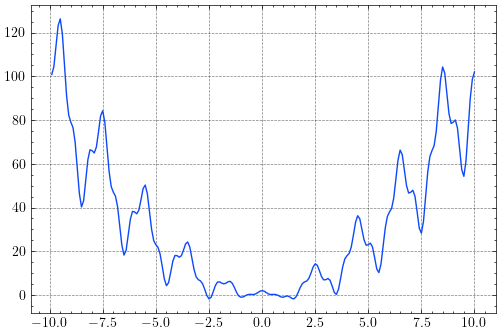

In [80]:
data = np.loadtxt(DIR+file, delimiter=',', skiprows=1)
x, y = np.loadtxt(DIR+"cost_function.csv", delimiter=',', skiprows=1, unpack=True)
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(x, y, label="Cost function")

In [81]:
iteration,cost,temperature,x0 = data.T

Iteration: 499

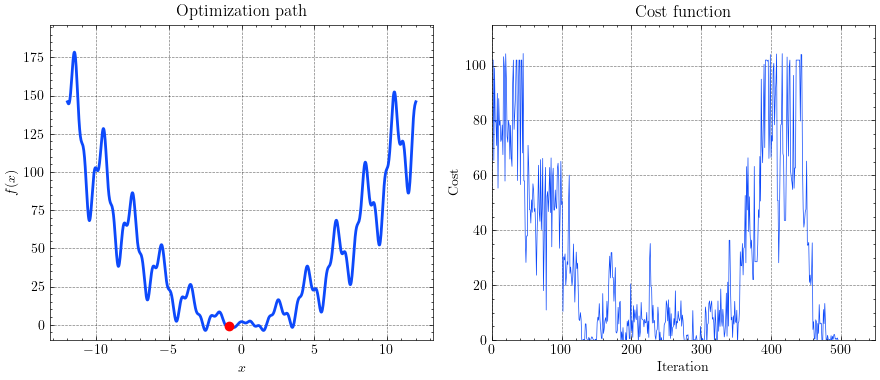

In [77]:
# Animation of the optimization
def f(x):
    alpha = 4 * np.abs(x)
    beta = 2
    y = x**2 + alpha * np.sin(np.pi*x) ** 3 + beta * np.cos(np.pi*x) ** 3
    return y

# First ax is the path of the optimization, second ax is the cost function
fig, ax = plt.subplots(1, 2, figsize=(9, 4))
ax[0].set_xlabel('$x$')
ax[0].set_ylabel('$f(x)$')
ax[0].set_title('Optimization path')

ax[1].set_xlim(0, 1.1 * np.max(iteration))
ax[1].set_ylim(0, 1.1 * np.max(cost))
ax[1].set_xlabel('Iteration')
ax[1].set_ylabel('Cost')
ax[1].set_title('Cost function')


line, = ax[0].plot([], [], lw=2)
point, = ax[0].plot([], [], 'o', color='red')
cost_plot, = ax[1].plot([], [], lw=0.5)

x = np.linspace(-12, 12, 1000)
y = f(x)
ax[0].set_xlim(np.min(x)*1.1, np.max(x)*1.1)
ax[0].set_ylim(min(np.min(y)*1.1, -10), np.max(y)*1.1)

fig.tight_layout()


def init():
    line.set_data([], [])
    point.set_data([], [])
    cost_plot.set_data([], [])
    return line, point, cost_plot


def animate(i):
    print("\rIteration: %d" % iteration[i], end="", flush=True)
    line.set_data(x, y)
    point.set_data(x0[i], f(x0[i]))
    cost_plot.set_data(iteration[:i], cost[:i])
    return line, point, cost_plot


anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(x0), interval=40, blit=True)
anim.save('optimization.mp4', fps=10, extra_args=['-vcodec', 'libx264'], dpi=300)

In [ ]:
# Plot solution path
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(iteration, x0, '-', label='x0')
ax.set_xlabel('Iteration')
ax.set_ylabel('x0')
ax.legend()
fig.tight_layout()

In [ ]:
# Plot the cost function
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(iteration, cost, '-', label='cost')
ax.set_xlabel('Iteration')
ax.set_ylabel('Cost')
ax.legend()
fig.tight_layout()


In [ ]:
# Plot the temperature
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(iteration, temperature, '-', label='temperature')
ax.set_xlabel('Iteration')
ax.set_ylabel('Temperature')
ax.legend()
fig.tight_layout()


In [ ]:
def cost_function(x):
    alpha = 4 * np.abs(x)
    beta = 2
    y = x**2 + alpha * np.sin(np.pi*x) ** 3 + beta * np.cos(np.pi*x) ** 3
    return y
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(x, cost_function(x), '-', label='cost')

# Find the minimum
np.linspace(-10, 10, 1000)
min_x = x[np.argmin(cost_function(x))]
min_y = cost_function(min_x)
print("Minimum: x = %.2f, y = %.2f" % (min_x, min_y))
